In [16]:
from predictors import PeriodicMeanStd
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [17]:
model = PeriodicMeanStd(flag_week=True, flag_hour=True, flag_minute=True)

# Train

In [18]:
#Data train
path = "/home/gastong/Documentos/TELCO/v0/"
filenames = ["TELCO_data_2021_01.zip", "TELCO_data_2021_02.zip", "TELCO_data_2021_03.zip"]
labels_filenames = ["TELCO_labels_2021_01.zip", "TELCO_labels_2021_02.zip", "TELCO_labels_2021_03.zip"]

data_train = pd.DataFrame()
labels_train = pd.DataFrame()

for i in range(3):
    data_train = pd.concat([data_train, pd.read_csv(path+filenames[i])])
    labels_train = pd.concat([labels_train, pd.read_csv(path+labels_filenames[i])])

In [19]:
def set_index(dataRaw):
    col_time = dataRaw.columns[0]
    dataRaw[col_time] = pd.to_datetime(dataRaw[col_time])
    dataRaw = dataRaw.set_index(col_time)
    return dataRaw

def fill(dataRaw):
    X = dataRaw.copy()
    X.fillna(method='ffill', inplace=True) 
    X.fillna(method='bfill', inplace=True)
    return X

def outliers(dataRaw, max_std):
    X = dataRaw.copy()
    
    if outliers:
        z_scores = (X-X.mean())/X.std()
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores > max_std)
        X = X.mask(filtered_entries)
    return X

In [20]:
data_train = outliers(fill(set_index(data_train)), 5)
labels_train = fill(set_index(labels_train))

In [21]:
model.fit(data_train)

# Operation Point

In [22]:
model.flag_hour == True

True

In [31]:

model.alpha_selection(data_train, labels_train, custom_metrics=True, max_alpha=5)

Alpha selection...


In [32]:
model.alpha

array([3., 3., 2., 3., 3., 2., 3., 3., 2., 2., 2., 2.])

# Validation

In [33]:
#Data val
filenames = "TELCO_data_2021_04.zip"
labels_filenames = "TELCO_labels_2021_04.zip"

data_val = pd.read_csv(path+filenames)
labels_val = pd.read_csv(path+labels_filenames)

data_val = fill(set_index(data_val))
labels_val = set_index(labels_val)

In [34]:
results, mean_p, th_d, th_u = model.predict(data_val)

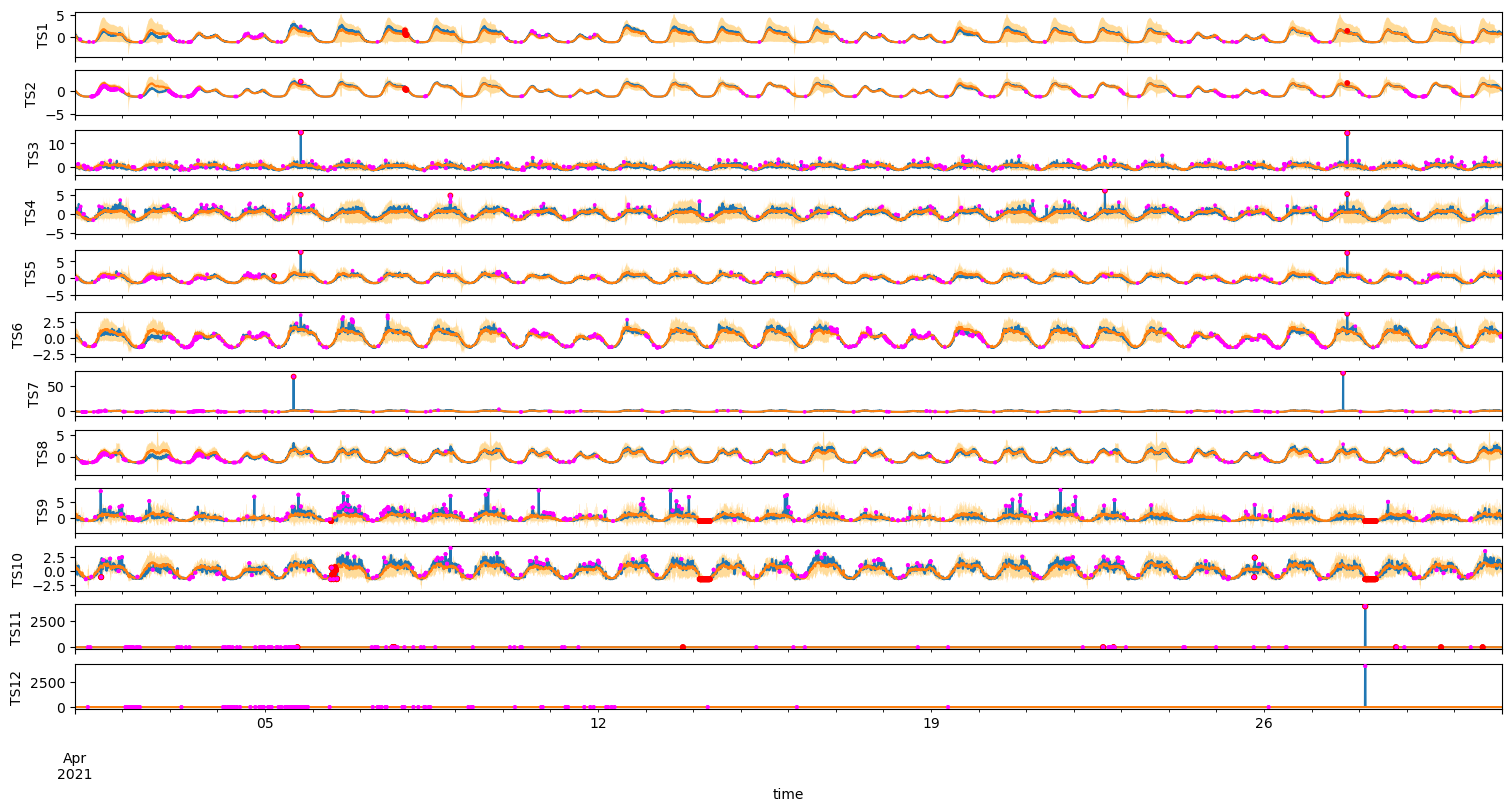

In [35]:
fig, axes = plt.subplots(12, 1, figsize=(15,8), constrained_layout=True, sharex=True)

# plot counter
count=0
data = data_val.copy()
labels = labels_val.copy()

for r in range(12):
    for c in range(1):
        data[data.columns[count]].plot(ax=axes[r])
        mean_p[mean_p.columns[count]].plot(ax=axes[r])
        axes[r].fill_between(data[data.columns[count]].index,
                         th_u[data.columns[count]],
                         th_d[data.columns[count]],
                         facecolor='orange', alpha=0.4, interpolate=True)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=10*labels[labels.columns[count]].values,
                c='red',
                zorder=5)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=3*results[results.columns[count]].values,
                c='magenta',
                zorder=10)
        axes[r].set_ylabel(data.columns[count])
        count+=1
#plt.savefig("TELCO_data_2021_labeled.pdf")

# Test

In [28]:
#Data test
path = "/home/gastong/Documentos/TELCO/v0/"
filenames = ["TELCO_data_2021_05.zip", "TELCO_data_2021_06.zip", "TELCO_data_2021_07.zip"]
labels_filenames = ["TELCO_labels_2021_05.zip", "TELCO_labels_2021_06.zip", "TELCO_labels_2021_07.zip"]

data_test = pd.DataFrame()
labels_test = pd.DataFrame()
for i in range(3):
    data_test = pd.concat([data_test, pd.read_csv(path+filenames[i])])
    labels_test = pd.concat([labels_test, pd.read_csv(path+labels_filenames[i])])


data_test = fill(set_index(data_test))
labels_test = fill(set_index(labels_test))

In [29]:
results, mean_p, th_d, th_u = model.predict(data_test)

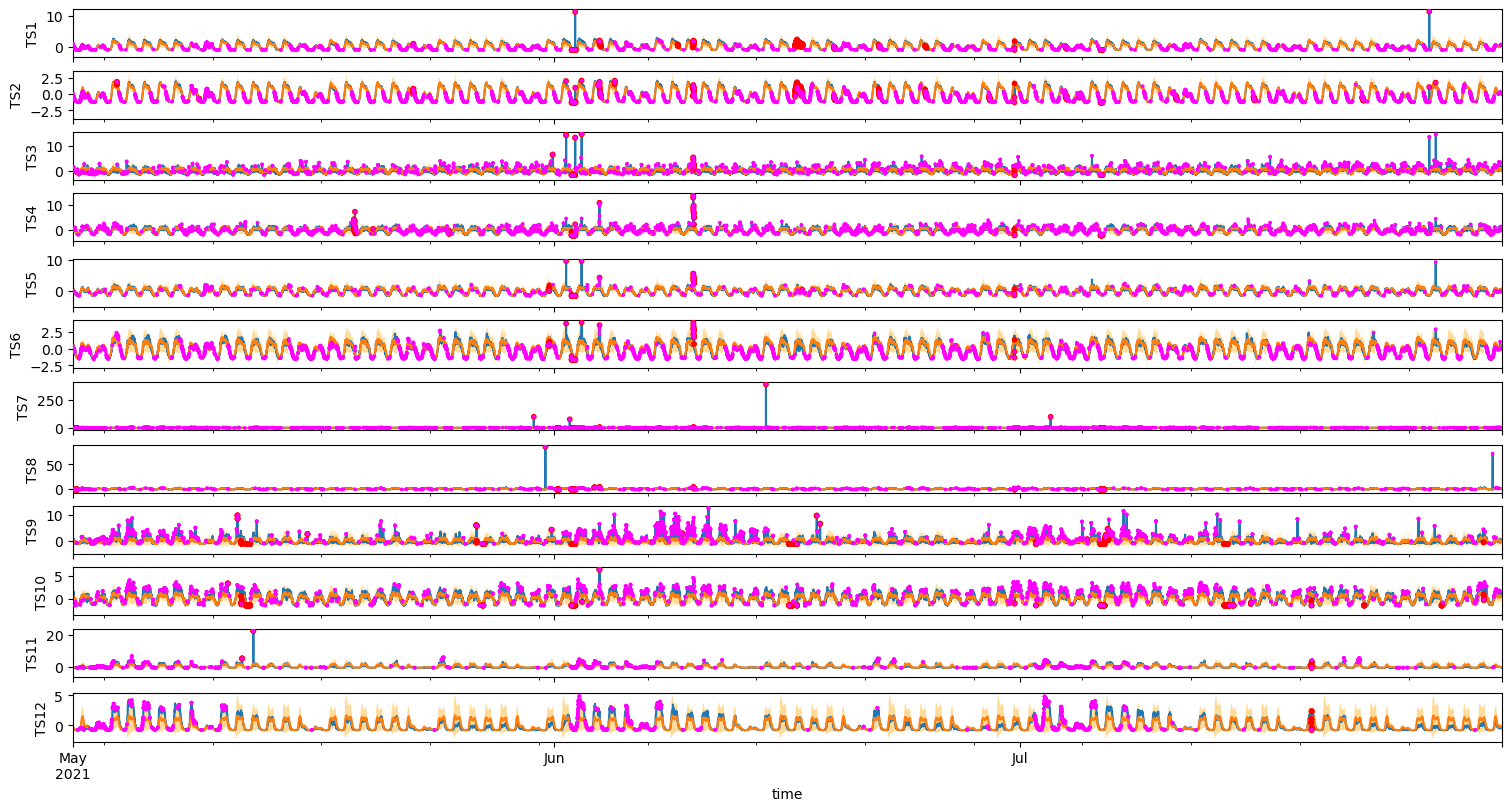

In [30]:
fig, axes = plt.subplots(12, 1, figsize=(15,8), constrained_layout=True, sharex=True)

# plot counter
count=0
data = data_test.copy()
labels = labels_test.copy()

for r in range(12):
    for c in range(1):
        data[data.columns[count]].plot(ax=axes[r])
        mean_p[mean_p.columns[count]].plot(ax=axes[r])
        axes[r].fill_between(data[data.columns[count]].index,
                         th_u[data.columns[count]],
                         th_d[data.columns[count]],
                         facecolor='orange', alpha=0.4, interpolate=True)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=10*labels[labels.columns[count]].values,
                c='red',
                zorder=5)
        axes[r].scatter(x=data[data.columns[count]].index,
                y=data[data.columns[count]].values,
                s=3*results[results.columns[count]].values,
                c='magenta',
                zorder=10)
        axes[r].set_ylabel(data.columns[count])
        count+=1
#plt.savefig("TELCO_data_2021_labeled.pdf")